In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib ipympl

In [2]:
df = pd.read_csv('./q2_dataset.csv')
df

,x1,x2,y
0,1.6,851,293
1,15.5,816,230
2,22.0,1058,172
3,43.0,1201,91
4,33.0,1357,113
5,40.0,1115,125


In [3]:
X = df[['x1', 'x2']].values
y_true = np.reshape(df['y'], (-1, 1))

In [4]:
Z = np.hstack([X, X**3])

Z_norm = (Z - np.mean(Z, axis=0)) / np.std(Z, axis=0)
Z_norm = np.hstack([Z_norm, np.ones((X.shape[0], 1))])

y_true_norm = (y_true - np.mean(y_true, axis=0)) / np.std(y_true, axis=0)

In [5]:
W = np.random.randn(2 * X.shape[1] + 1, 1)

In [6]:
def cost_func(y_true, y_pred):
    return np.mean((y_true-y_pred)**2)

In [7]:
def djdw(y_pred, y_true, Z):
    return (2 / y_pred.shape[0]) * (Z.T @ (y_pred-y_true))

In [8]:
def gradiant_descent(y_pred, y_true, Z, W, learning_rate):
    W -= learning_rate * djdw(y_pred, y_true, Z)
    return W

In [9]:
def model(y_true, Z, W, learning_rate):
    y_pred = Z @ W
    W = gradiant_descent(y_pred, y_true, Z, W, learning_rate)
    return W, cost_func(y_true, y_pred)    

In [10]:
epochs = 1000
learning_rate = 0.05

for epoch in range(epochs):
    W, cost = model(y_true_norm, Z_norm, W, learning_rate)
    if epoch % 100 == 99:
        print(f'epoch: {epoch}, cost: {cost}')

epoch: 99, cost: 0.08533589827704308
epoch: 199, cost: 0.046679380763967944
epoch: 299, cost: 0.03290681925996058
epoch: 399, cost: 0.026941386286051163
epoch: 499, cost: 0.023578332094667507
epoch: 599, cost: 0.021210413372383174
epoch: 699, cost: 0.019323519938401874
epoch: 799, cost: 0.017738089876780796
epoch: 899, cost: 0.016379012148926862
epoch: 999, cost: 0.015205556162737626


In [11]:
y_pred_norm = Z_norm @ W
y_pred = y_pred_norm * np.std(y_true) + np.mean(y_true)

In [12]:
from sklearn.metrics import r2_score, root_mean_squared_error

print(f'R2_score: {r2_score(y_true, y_pred)}, RMSE: {root_mean_squared_error(y_true, y_pred)}')

R2_score: 0.9848053416642438, RMSE: 8.75183320083149


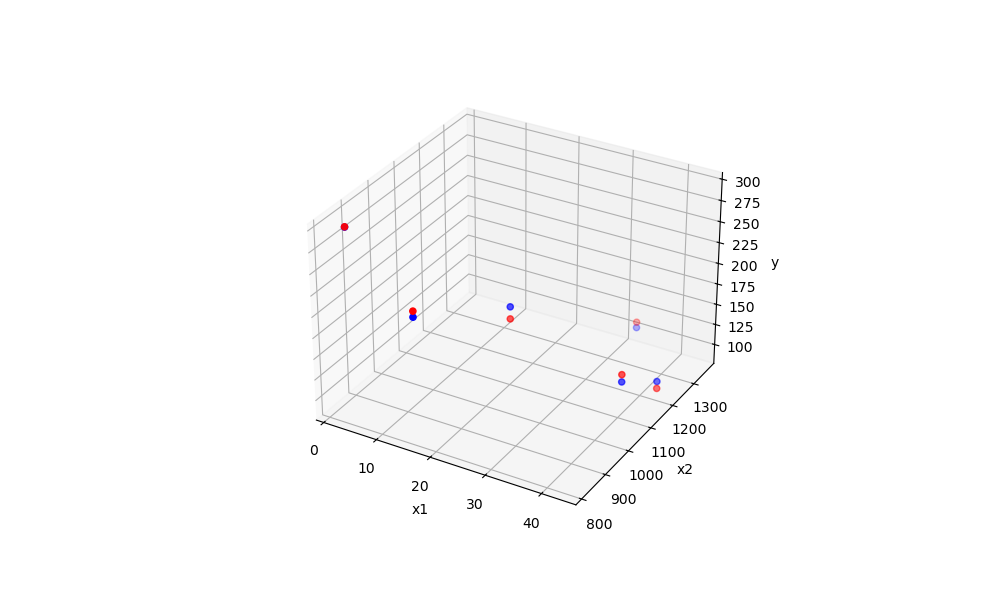

In [13]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.scatter(X[:, 0], X[:, 1], y_true.flatten(), color='red')
ax.scatter(X[:, 0], X[:, 1], y_pred.flatten(), color='blue')
plt.show()